# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

They will get 15 elixirs on average.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

50 loot boxes would gurantee an elixir drop. Please note that we can adjust the number needed of by the changing depending on the pseudorandom engine.

In [1]:
from scipy import stats
X = stats.binom(50, 0.15)
print(X.pmf(1))

0.002609688209229705


#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

X is a discrete random variable because the number of elixirs drops is a countable random outcome.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

The binomial distribution is best suited for X because opening 100 loot boxes is binary outcome event or commonly known as sucess or failure outcome that is repeated multiple times.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

There is 4% chance that a user gets more than 20 elixirs from 100 loot boxes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
X = stats.binom(100, 0.15)

In [3]:
print(X.pmf(20))

0.040224490661417686


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

There is a 96% chance that a user get a total of 20 or less elixirs from 100 loot boxes.

In [4]:
print(X.cdf(21))

0.960721908575349


In [5]:
cdf = stats.binom.cdf(21,100, 0.15)

In [6]:
cdf

0.960721908575349

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

There is 4% chance that a user gets more than 20 elixirs from 100 loot boxes.

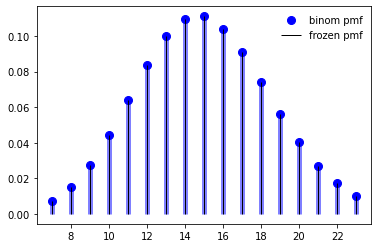

In [7]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
n,p = 100, 0.15
rv = binom(n, p)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

The binomial distribution is best suited for X because purchasing a loot box is binary outcome event or commonly known as sucess or failure outcome that is repeated multiple times.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [8]:
print(round(500000/2.7))

185185


186,000 users need to on your platform to make $500,000.

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [9]:
high_value_users_revenue = 186000*5
low_value_users_revenue = round(186000*0.8) # We can change 0.8 to new average loot boxes per user.

In [10]:
print(f"We can expect {high_value_users_revenue} if there is 186,000 high value users.")
print(f"We can expect {low_value_users_revenue} if there is 186,000 low value users.")

We can expect 930000 if there is 186,000 high value users.
We can expect 148800 if there is 186,000 low value users.


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

You need to purchase 50 loot boxes to gurantee an elixir at 15% drop rate. There is only 4% to earn more than 20 elixirs. 186,000 users need to on your platform to make $500,000 with average purchase rate of 2.7 loot boxes per user.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [11]:
drop_list = ["elixir","none"]
list = [1,0]
ver1 = np.random.choice(drop_list, 100000, p=[0.15,0.85])

In [12]:
unique, counts = np.unique(ver1, return_counts=True)
dict(zip(unique, counts))

{'elixir': 14808, 'none': 85192}

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

In [13]:
drop_list = ["magical elixir","golden pendant","steel armor","bronze coin"]
ver2 = np.random.choice(drop_list, 100000, p=[0.01,0.09,0.3,0.6])
unique, counts = np.unique(ver2, return_counts=True)
dict(zip(unique, counts))

{'bronze coin': 59984,
 'golden pendant': 8919,
 'magical elixir': 1012,
 'steel armor': 30085}

We should put it in a dataframe as it would be easier to manage and edit.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

The metrics that are important to measure is revenue and player feedback. Player feedback is important as it is crucial for the long-term sucess of the company.